In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from GridTrade_ETF import backtest
from configuration import total_fund

# 网格参数 ###########################################################################
num_orders = 10  # 单侧的网格数量
grid_method = 'uni'  # param can be 'uni', 'geo'
conservative_factor = 3  # when trend is positive, grid_width will be adjusted to conservative_factor * grid_width
# for grids above the baseline, and when trend is negative, grid_width below the baseline will be adjusted
vol_factor = 1  # 给预测的波动标准差乘的系数

In [2]:
# get data
# 获得华泰柏瑞沪深300ETF的2022年06月22日 10:00:00-2023年06月22日 10:00:00的分钟数据
df = pd.read_csv('data.csv')

In [3]:
# 取最近30000个数据
df = df.iloc[-30000:]

In [4]:
test_result = backtest(df)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


[3.95117157 3.94834315 3.94551472 3.94268629 3.93985786 3.93702944
 3.93420101 3.93137258 3.92854416 3.92571573 3.954      3.95682843
 3.95965685 3.96248528 3.96531371 3.96814214 3.97097056 3.97379899
 3.97662742 3.97945584 3.98228427] -1 -1264.0 -1264.0 10000000
[3.95393229 3.94986457 3.94579686 3.94172915 3.93766144 3.93359372
 3.92952601 3.9254583  3.92139058 3.91732287 3.958      3.96206771
 3.96613543 3.97020314 3.97427085 3.97833856 3.98240628 3.98647399
 3.9905417  3.99460942 3.99867713] 10 12661.0 12661.0 10002781.8
[3.94531767 3.94063534 3.93595301 3.93127068 3.92658835 3.92190603
 3.9172237  3.91254137 3.90785904 3.90317671 3.95       3.95468233
 3.95936466 3.96404699 3.96872932 3.97341165 3.97809397 3.9827763
 3.98745863 3.99214096 3.99682329] 10 12656.0 1265.0 9986336.400000002
[3.93301921 3.92103842 3.90905763 3.89707684 3.88509605 3.87311526
 3.86113448 3.84915369 3.8371729  3.82519211 3.945      3.9489936
 3.95298719 3.95698079 3.96097439 3.96496798 3.96896158 3.97295517

In [5]:
amount = np.floor(total_fund / (test_result['price'].iloc[0] * 100))
available_fund = total_fund - amount * test_result['price'].iloc[0] * 100
test_result['total_value_baseline'] = available_fund + amount * test_result['price'] * 100

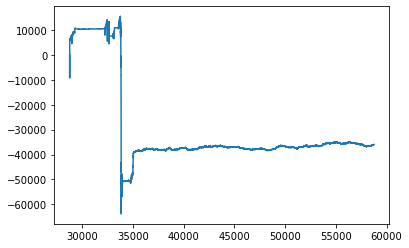

In [6]:
plt.plot(test_result['total_value'] - test_result['total_value_baseline'])
plt.show()

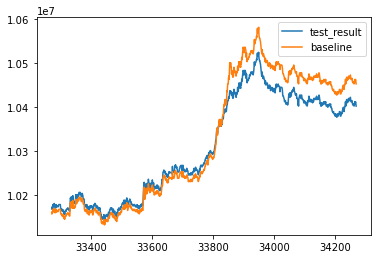

In [13]:
plt.plot(test_result['total_value'].iloc[4500:5500], label='test_result')
plt.plot(test_result['total_value_baseline'].iloc[4500:5500], label='baseline')
plt.legend()
plt.show()

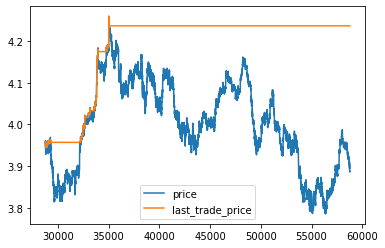

In [7]:
plt.plot(test_result['price'], label='price')
plt.plot(test_result['last_trade_price'], label='last_trade_price')
plt.legend()
plt.show()

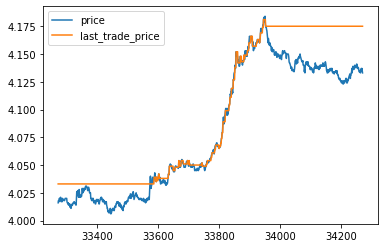

In [14]:
plt.plot(test_result['price'].iloc[4500:5500], label='price')
plt.plot(test_result['last_trade_price'].iloc[4500:5500], label='last_trade_price')
plt.legend()
plt.show()

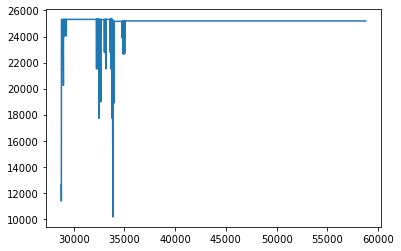

In [8]:
plt.plot(test_result['security_amount'])
plt.show()

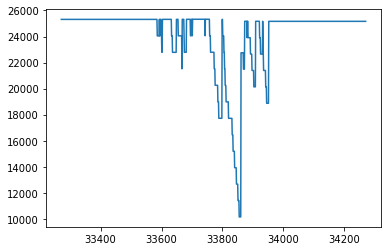

In [15]:
plt.plot(test_result['security_amount'].iloc[4500:5500])
plt.show()

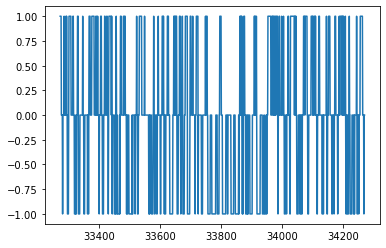

In [16]:
plt.plot(test_result['trend'].iloc[4500:5500])
plt.show()

横坐标33800附近，趋势预测-1为下跌，与实际上涨行情相反，上涨时的卖出过多